In [1]:
import numpy as np
import statistics as st
import pandas as pd 
import statsmodels.api as sm
from scipy import stats

In [ ]:
#Giả thuyết 1: Lợi nhuận của các ngân hàng lớn có ảnh hưởng tích cực đến tăng trưởng GDP của Việt Nam.

import pandas as pd
import statsmodels.api as sm

# Load data for banks and GDP
df_TCB = pd.read_csv('financial_data_TCB_filtered.csv', encoding='ISO-8859-1')
df_VCB = pd.read_csv('financial_data_VCB_filtered.csv', encoding='ISO-8859-1')
df_MBB = pd.read_csv('financial_data_MBB_filtered.csv', encoding='ISO-8859-1')
df_BID = pd.read_csv('financial_data_BID_filtered.csv', encoding='ISO-8859-1')
df_GDP = pd.read_csv('gdp_quarterly_2013_2023.csv', encoding='ISO-8859-1')

# Define selected features with high relevance to Total Assets
selected_features = [
    'year' ,'roe', 'roa', 'interestMargin', 'badDebtPercentage', 'creditGrowth', 
    'operationProfit',  'postTaxProfit', 'yearOperationProfitGrowth',
    'equityOnTotalAsset'
]

# Helper function to filter and rename columns for each bank
def filter_and_rename(data, bank_name):
    available_features = [col for col in selected_features if col in data.columns]
    filtered_data = data[available_features].copy()
    filtered_data.columns = [f"{bank_name}_{col}" if col != 'year' else col for col in filtered_data.columns]
    return filtered_data

# Apply the filter function to each bank's dataset
vcb_filtered = filter_and_rename(df_VCB, 'VCB')
tcb_filtered = filter_and_rename(df_TCB, 'TCB')
mbb_filtered = filter_and_rename(df_MBB, 'MBB')
bid_filtered = filter_and_rename(df_BID, 'BID')

# Prepare GDP data by extracting the year from the Date column
df_GDP['year'] = pd.to_datetime(df_GDP['Date']).dt.year
gdp_q4 = df_GDP[(df_GDP['year'] >= 2013) & (df_GDP['year'] <= 2023)]

# Merge the bank data with GDP data on 'year'
merged_data = gdp_q4[['year', 'Quarterly_GDP']].merge(vcb_filtered, on='year') \
                                               .merge(tcb_filtered, on='year') \
                                               .merge(mbb_filtered, on='year') \
                                               .merge(bid_filtered, on='year')

# Define the independent variables (X) and dependent variable (y)
X = merged_data.drop(columns=['year', 'Quarterly_GDP'])  # Independent variables
y = merged_data['Quarterly_GDP']  # Dependent variable: Quarterly GDP growth

# Add a constant to the independent variables for the linear regression model
X = sm.add_constant(X)

# Fit the multivariate linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary to show coefficients and p-values
print(model.summary())

# Extract and print significant features based on p-value < 0.05
significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()
print("Significant features with p-value < 0.05:", significant_features)




                            OLS Regression Results                            
Dep. Variable:          Quarterly_GDP   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2545.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:39:59   Log-Likelihood:            -1.4968e+05
No. Observations:               11264   AIC:                         2.994e+05
Df Residuals:                   11227   BIC:                         2.997e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [24]:
# Perform ANOVA to understand the overall effect of bank features on GDP growth
import statsmodels.formula.api as smf

# Add 'year' column back to the merged data for ANOVA analysis
merged_data['year'] = merged_data['year'].astype(str)  # Convert year to string for categorical purposes

# Create formula for ANOVA analysis (use '+' to include all features, '~' separates dependent from independent variables)
formula = 'Quarterly_GDP ~ ' + ' + '.join([col for col in merged_data.columns if col not in ['year', 'Quarterly_GDP']])

# Fit an OLS model with the formula for ANOVA
anova_model = smf.ols(formula, data=merged_data).fit()

# Perform ANOVA using statsmodels
anova_table = sm.stats.anova_lm(anova_model, typ=2)  # Type 2 ANOVA to evaluate effect of each independent variable

# Print the ANOVA table
print(anova_table)

                                     sum_sq       df           F        PR(>F)
VCB_roe                        5.066943e+10      1.0    2.477084  1.155444e-01
VCB_roa                        1.910258e+11      1.0    9.338705  2.248908e-03
VCB_interestMargin             1.912762e+11      1.0    9.350949  2.233946e-03
VCB_badDebtPercentage          3.000908e+11      1.0   14.670584  1.287256e-04
VCB_creditGrowth               2.578089e+11      1.0   12.603540  3.865918e-04
VCB_operationProfit            1.320863e+12      1.0   64.573221  1.023154e-15
VCB_postTaxProfit              6.394128e+11      1.0   31.259068  2.310647e-08
VCB_yearOperationProfitGrowth  1.216089e+12      1.0   59.451143  1.359523e-14
VCB_equityOnTotalAsset         7.084679e+10      1.0    3.463498  6.276360e-02
TCB_roe                        9.397936e+11      1.0   45.943828  1.277912e-11
TCB_roa                        6.248567e+11      1.0   30.547463  3.330720e-08
TCB_interestMargin             2.484820e+11      1.0

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Load data for banks and GDP
df_TCB = pd.read_csv('financial_data_TCB_filtered.csv', encoding='ISO-8859-1')
df_VCB = pd.read_csv('financial_data_VCB_filtered.csv', encoding='ISO-8859-1')
df_MBB = pd.read_csv('financial_data_MBB_filtered.csv', encoding='ISO-8859-1')
df_BID = pd.read_csv('financial_data_BID_filtered.csv', encoding='ISO-8859-1')
df_GDP = pd.read_csv('gdp_quarterly_2013_2023.csv', encoding='ISO-8859-1')

# Define selected features with high relevance to Total Assets
selected_features = [
    'year', 'roe', 'roa', 'interestMargin', 'badDebtPercentage', 'creditGrowth', 
    'operationProfit', 'postTaxProfit', 'yearOperationProfitGrowth', 'equityOnTotalAsset'
]

# Helper function to filter and rename columns for each bank
def filter_and_rename(data, bank_name):
    available_features = [col for col in selected_features if col in data.columns]
    filtered_data = data[available_features].copy()
    filtered_data.columns = [f"{bank_name}_{col}" if col != 'year' else col for col in filtered_data.columns]
    return filtered_data

# Apply the filter function to each bank's dataset
vcb_filtered = filter_and_rename(df_VCB, 'VCB')
tcb_filtered = filter_and_rename(df_TCB, 'TCB')
mbb_filtered = filter_and_rename(df_MBB, 'MBB')
bid_filtered = filter_and_rename(df_BID, 'BID')

# Prepare GDP data by extracting the year from the Date column
df_GDP['year'] = pd.to_datetime(df_GDP['Date']).dt.year
gdp_q4 = df_GDP[(df_GDP['year'] >= 2013) & (df_GDP['year'] <= 2023)]

# Merge the bank data with GDP data on 'year'
merged_data = gdp_q4[['year', 'Quarterly_GDP']].merge(vcb_filtered, on='year') \
                                               .merge(tcb_filtered, on='year') \
                                               .merge(mbb_filtered, on='year') \
                                               .merge(bid_filtered, on='year')

# Define the independent variables (X) and dependent variable (y)
X = merged_data.drop(columns=['year', 'Quarterly_GDP'])  # Independent variables
y = merged_data['Quarterly_GDP']  # Dependent variable: Quarterly GDP growth

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent variables for both training and testing sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multivariate linear regression model on training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display predictions alongside actual values for comparison
predictions = pd.DataFrame({'Actual GDP': y_test, 'Predicted GDP': y_pred})
print(predictions)

# Calculate and print evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}, R-squared: {r2}')

# Calculate MAPE on the test set
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE on test set:", mape_test)


        Actual GDP  Predicted GDP
8957  2.239161e+06   2.181974e+06
4165  1.454598e+06   1.671530e+06
2592  1.461868e+06   1.444205e+06
5317  1.603250e+06   1.840274e+06
5076  1.785189e+06   1.659858e+06
...            ...            ...
2791  1.461868e+06   1.369087e+06
5471  1.821876e+06   1.793106e+06
5595  1.821876e+06   1.797550e+06
8473  2.153039e+06   2.156924e+06
7367  1.792003e+06   2.059880e+06

[2253 rows x 2 columns]
RMSE: 141846.87818289184, R-squared: 0.8924709046685546
MAPE on test set: 0.06501303415111157


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [6]:
#Mô hình Ridge and Lasso
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data for banks and GDP
df_TCB = pd.read_csv('financial_data_TCB_filtered.csv', encoding='ISO-8859-1')
df_VCB = pd.read_csv('financial_data_VCB_filtered.csv', encoding='ISO-8859-1')
df_MBB = pd.read_csv('financial_data_MBB_filtered.csv', encoding='ISO-8859-1')
df_BID = pd.read_csv('financial_data_BID_filtered.csv', encoding='ISO-8859-1')
df_GDP = pd.read_csv('gdp_quarterly_2013_2023.csv', encoding='ISO-8859-1')

# Define selected features
selected_features = [
    'year', 'roe', 'roa', 'interestMargin', 'badDebtPercentage', 'creditGrowth', 
    'operationProfit', 'postTaxProfit', 'yearOperationProfitGrowth', 'equityOnTotalAsset'
]

# Helper function to filter and rename columns for each bank
def filter_and_rename(data, bank_name):
    available_features = [col for col in selected_features if col in data.columns]
    filtered_data = data[available_features].copy()
    filtered_data.columns = [f"{bank_name}_{col}" if col != 'year' else col for col in filtered_data.columns]
    return filtered_data

# Apply the filter function to each bank's dataset
vcb_filtered = filter_and_rename(df_VCB, 'VCB')
tcb_filtered = filter_and_rename(df_TCB, 'TCB')
mbb_filtered = filter_and_rename(df_MBB, 'MBB')
bid_filtered = filter_and_rename(df_BID, 'BID')

# Prepare GDP data by extracting the year from the Date column
df_GDP['year'] = pd.to_datetime(df_GDP['Date']).dt.year
gdp_q4 = df_GDP[(df_GDP['year'] >= 2013) & (df_GDP['year'] <= 2023)]

# Merge the bank data with GDP data on 'year'
merged_data = gdp_q4[['year', 'Quarterly_GDP']].merge(vcb_filtered, on='year') \
                                               .merge(tcb_filtered, on='year') \
                                               .merge(mbb_filtered, on='year') \
                                               .merge(bid_filtered, on='year')

# Define the independent variables (X) and dependent variable (y)
X = merged_data.drop(columns=['year', 'Quarterly_GDP'])  # Independent variables
y = merged_data['Quarterly_GDP']  # Dependent variable: Quarterly GDP growth

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for Ridge and Lasso models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Apply Lasso Regression with increased max_iter to improve convergence
lasso_model = Lasso(alpha=0.1, max_iter=10000)  # Increased max_iter
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate evaluation metrics for Ridge
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - RMSE: {rmse_ridge}, R-squared: {r2_ridge}")

# Calculate evaluation metrics for Lasso
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - RMSE: {rmse_lasso}, R-squared: {r2_lasso}")


Ridge Regression - RMSE: 141830.13373783624, R-squared: 0.8924962899118535
Lasso Regression - RMSE: 141846.69324865262, R-squared: 0.8924711850525677


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 9011, number of used features: 36
[LightGBM] [Info] Start training from score 1829634.870131
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


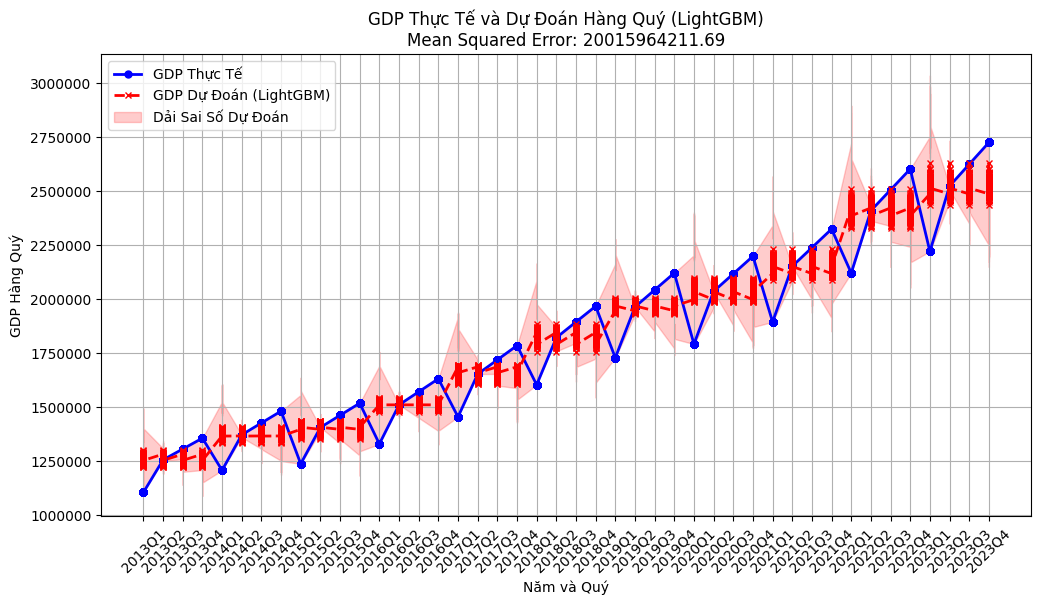

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
   year_quarter  GDP_Predicted
0        2024Q1   2.514925e+06
1        2024Q2   2.514925e+06
2        2024Q3   2.514925e+06
3        2024Q4   2.514925e+06
4        2025Q1   2.514925e+06
5        2025Q2   2.514925e+06
6        2025Q3   2.514925e+06
7        2025Q4   2.514925e+06
8        2026Q1   2.514925e+06
9        2026Q2   2.514925e+06
10       2026Q3   2.514925e+06
11       2026Q4   2.514925e+06
12       2027Q1   2.514925e+06
13       2027Q2   2.514925e+06
14       2027Q3   2.514925e+06
15       2027Q4   2.514925e+06
16       2028Q1   2.514925e+06
17       2028Q2   2.514925e+06
18       2028Q3   2.514925e+06
19       2028Q4   2.514925e+06


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17288\167188969.py:90: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_quarters = pd.date_range(start=str(merged_data['year_quarter'].iloc[-1].end_time + timedelta(days=1)),


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from datetime import timedelta

# Đọc dữ liệu từ các file CSV
df_TCB = pd.read_csv('financial_data_TCB_filtered.csv', encoding='ISO-8859-1')
df_VCB = pd.read_csv('financial_data_VCB_filtered.csv', encoding='ISO-8859-1')
df_MBB = pd.read_csv('financial_data_MBB_filtered.csv', encoding='ISO-8859-1')
df_BID = pd.read_csv('financial_data_BID_filtered.csv', encoding='ISO-8859-1')
df_GDP = pd.read_csv('gdp_quarterly_2013_2023.csv', encoding='ISO-8859-1')

# Các đặc trưng được chọn có khả năng ảnh hưởng đến GDP
selected_features = [
    'year', 'roe', 'roa', 'interestMargin', 'badDebtPercentage', 'creditGrowth', 
    'operationProfit', 'postTaxProfit', 'yearOperationProfitGrowth', 'equityOnTotalAsset'
]

# Hàm hỗ trợ lọc và đổi tên cột cho mỗi ngân hàng
def filter_and_rename(data, bank_name):
    available_features = [col for col in selected_features if col in data.columns]
    filtered_data = data[available_features].copy()
    filtered_data.columns = [f"{bank_name}_{col}" if col != 'year' else col for col in filtered_data.columns]
    return filtered_data

# Áp dụng hàm lọc cho dữ liệu của từng ngân hàng
vcb_filtered = filter_and_rename(df_VCB, 'VCB')
tcb_filtered = filter_and_rename(df_TCB, 'TCB')
mbb_filtered = filter_and_rename(df_MBB, 'MBB')
bid_filtered = filter_and_rename(df_BID, 'BID')

# Chuẩn bị dữ liệu GDP bằng cách trích xuất năm và quý từ cột Date
df_GDP['year'] = pd.to_datetime(df_GDP['Date']).dt.year
df_GDP['year_quarter'] = pd.to_datetime(df_GDP['Date']).dt.to_period('Q')
gdp_q4 = df_GDP[(df_GDP['year'] >= 2013) & (df_GDP['year'] <= 2023)]

# Gộp dữ liệu của ngân hàng với dữ liệu GDP theo 'year'
merged_data = gdp_q4[['year', 'year_quarter', 'Quarterly_GDP']].merge(vcb_filtered, on='year') \
                                               .merge(tcb_filtered, on='year') \
                                               .merge(mbb_filtered, on='year') \
                                               .merge(bid_filtered, on='year')

# Định nghĩa X và y
X = merged_data.drop(columns=['year', 'year_quarter', 'Quarterly_GDP'])  # Biến độc lập
y = merged_data['Quarterly_GDP']  # Biến phụ thuộc: Tăng trưởng GDP

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình LightGBM với các siêu tham số đã điều chỉnh
lgb_model = LGBMRegressor(random_state=42, n_estimators=500, learning_rate=0.05, max_depth=10, num_leaves=31, min_data_in_leaf=20, reg_alpha=0.1, reg_lambda=0.1)

# Huấn luyện mô hình trên tập huấn luyện
lgb_model.fit(X_train, y_train)

# Dự đoán trên toàn bộ tập dữ liệu
y_pred_all = lgb_model.predict(X)

# Tính toán các chỉ số lỗi
mse = mean_squared_error(y, y_pred_all)

# Tạo biểu đồ đường cho GDP thực tế và GDP dự đoán
plt.figure(figsize=(12, 6))

# Chuyển đổi 'year_quarter' sang chuỗi để vẽ biểu đồ
plt.plot(merged_data['year_quarter'].astype(str), y, label='GDP Thực Tế', color='blue', marker='o', markersize=5, linewidth=2)
plt.plot(merged_data['year_quarter'].astype(str), y_pred_all, label='GDP Dự Đoán (LightGBM)', color='red', linestyle='--', marker='x', markersize=5, linewidth=2)

# Thêm dải sai số
error = np.abs(y - y_pred_all)
plt.fill_between(merged_data['year_quarter'].astype(str), y_pred_all - error, y_pred_all + error, color='red', alpha=0.2, label='Dải Sai Số Dự Đoán')

# Cải thiện định dạng và khả năng đọc của biểu đồ
plt.xlabel('Năm và Quý')
plt.ylabel('GDP Hàng Quý')
plt.title(f'GDP Thực Tế và Dự Đoán Hàng Quý (LightGBM)\nMean Squared Error: {mse:.2f}')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Dự đoán cho 5 năm tiếp theo (20 quý)
from datetime import timedelta

# Tạo các quý trong 5 năm tiếp theo
future_quarters = pd.date_range(start=str(merged_data['year_quarter'].iloc[-1].end_time + timedelta(days=1)), 
                                periods=20, freq='Q').to_period('Q')

# Tạo DataFrame cho các dự đoán tương lai
future_data = pd.DataFrame({
    'year_quarter': future_quarters
})
future_data['year'] = future_data['year_quarter'].dt.year

# Sử dụng giá trị thuộc tính cuối cùng của các ngân hàng làm dữ liệu dự đoán cho tương lai
last_bank_data = merged_data.drop(columns=['year', 'year_quarter', 'Quarterly_GDP']).iloc[-1]
future_features = pd.DataFrame([last_bank_data] * len(future_data), columns=last_bank_data.index)

# Kết hợp các thuộc tính dự đoán với các quý tương lai
future_X = pd.concat([future_data.reset_index(drop=True), future_features.reset_index(drop=True)], axis=1)
future_X = future_X.drop(columns=['year', 'year_quarter'])

# Dự đoán GDP trong 5 năm tiếp theo
future_predictions = lgb_model.predict(future_X)

# Kết hợp các dự đoán tương lai với các quý tương lai để hiển thị
future_data['GDP_Predicted'] = future_predictions

# Hiển thị dự đoán GDP trong 5 năm tới
print(future_data[['year_quarter', 'GDP_Predicted']])
